In [1]:
cd ..

d:\min\research_projects\MedicalDataKit


In [2]:
import numpy as np
import pandas as pd
from MedDataKit.utils import column_check

# Arrhythmia

In [3]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ArrhythmiaDataset

dataset = ArrhythmiaDataset()
data = dataset.load_raw_data()
data.head()

d:\min\research_projects\MedicalDataKit\data


,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R2,V6_Amp_S2,V6_Amp_P,V6_Amp_T,V6_Amp_QRSA,V6_Amp_QRSTA,Class
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
dataset.show_dataset_info()

Dataset name: arrhythmia (1997) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/5/arrhythmia
Dataset description: Distinguish between the presence and absence of cardiac arrhythmia and classifyit in one of the 16 groups.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 452, Number of columns: 280
Numerical features: (206): [ Age, Height, Weight, QRS duration, P-R interval, Q-T interval, T interval, P interval, QRS_angle, T_angle, P_angle, QRST_angle, J_angle, Heart rate, DI_Q, DI_R, DI_S, DI_R2, DI_S2, DI_num_deflections ...... V5_Amp_JJ, V5_Amp_Q, V5_Amp_R, V5_Amp_S, V5_Amp_R2, V5_Amp_S2, V5_Amp_P, V5_Amp_T, V5_Amp_QRSA, V5_Amp_QRSTA, V6_Amp_JJ, V6_Amp_Q, V6_Amp_R, V6_Amp_S, V6_Amp_R2, V6_Amp_S2, V6_Amp_P, V6_Amp_T, V6_Amp_QRSA, V6_Amp_QRSTA ]
Ordinal features: []
Binary features: (73): [ Sex,DI_Ragged_R,DI_Diphasic_R,DI_Ragged_P,DI_Diphasic_P,DI_Ragged_T,DI_Diphasic_T,DII_Ragged_R,DII_Diphasic_R,DII_Ragged_P,DII_Diphasic_P,DII_Ragge

In [16]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Class', 
    config = {'missing_strategy': 'impute', 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile'}, 
    verbose = True
)

['Class']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (452, 280)
After setting target feature:  (452, 280)
After feature engineering:  (452, 280)
After handling missing data:  (420, 279)
Final ml task dataset shape:  (420, 259)


,Age,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,T_angle,...,V4_Ragged_T,V4_Diphasic_T,V5_Diphasic_R,V5_Diphasic_P,V5_Diphasic_T,V6_Ragged_R,V6_Diphasic_R,V6_Ragged_P,V6_Diphasic_T,Class
0,0.690384,0.741773,0.581593,0.537768,0.626449,0.512984,0.553559,0.658068,0.393323,0.426760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.551888,0.515601,0.472294,0.449768,0.564322,0.612742,0.438528,0.250753,0.471093,0.486435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.543111,0.587521,0.673259,0.694650,0.527406,0.571332,0.580772,0.563963,0.673259,0.476171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.547288,0.613316,0.658068,0.608832,0.662690,0.543429,0.567598,0.688384,0.477651,0.419228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.325263,0.547288,0.374231,0.608832,0.544707,0.337310,0.553559,0.500863,0.682828,0.572473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.537768,0.454651,0.514728,0.438528,0.649787,0.552889,0.466239,0.641631,0.360049,0.397987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
448,0.448112,0.741773,0.619916,0.608832,0.415059,0.475280,0.600510,0.404329,0.635151,0.572473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
449,0.438528,0.529811,0.501151,0.645127,0.572092,0.494820,0.591967,0.635151,0.274615,0.360873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
450,0.409387,0.380084,0.411605,0.555587,0.298128,0.571332,0.614476,0.337310,0.528005,0.466545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [17]:
dataset.ml_task_dataset.show_dataset_info()

Task name: Class  Task type: classification
Target: Class Num classes: 12
Data Shape: (420, 259) (num 197 cat 61)
Missing ratio:  0.0%


# Colposcopy


In [18]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ColposcopyDataset

dataset = ColposcopyDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,dist_to_center_cervix,dist_to_center_os,class,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,0.265933,0.346294,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,1.000000,0.283059,green,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,0.518740,0.419375,green,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,0.347202,0.361672,green,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.0,0.000000,0.000000,0.000196,...,0.437852,0.673196,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [19]:
dataset.show_dataset_info()

Dataset name: colposcopy (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/384/quality+assessment+of+digital+colposcopies
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 287, Number of columns: 70
Numerical features: (62): [ cervix_area, os_area, walls_area, speculum_area, artifacts_area, cervix_artifacts_area, os_artifacts_area, walls_artifacts_area, speculum_artifacts_area, cervix_specularities_area, os_specularities_area, walls_specularities_area, speculum_specularities_area, specularities_area, area_h_max_diff, rgb_cervix_r_mean, rgb_cervix_r_std, rgb_cervix_r_mean_minus_std, rgb_cervix_r_mean_plus_std, rgb_cervix_g_mean ...... hsv_cervix_s_std, hsv_cervix_v_mean, hsv_cervix_v_std, hsv_total_h_mean, hsv_total_h_std, hsv_total_s_mean, hsv_total_s_std, hsv_total_v_mean, hsv_total_v_std, fit_cervix_hull_rate, fit_cervix_hull_to

In [20]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'expert_0_prediction', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['type_prediction', 'consensus_prediction', 'expert_0_prediction', 'expert_1_prediction', 'expert_2_prediction', 'expert_3_prediction', 'expert_4_prediction', 'expert_5_prediction']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (287, 70)
After setting target feature:  (287, 63)
After feature engineering:  (287, 63)
After handling missing data:  (287, 63)
Final ml task dataset shape:  (287, 63)


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0
0,0.437758,0.429191,0.428081,0.529094,0.674288,0.528213,0.000000,0.589941,0.578794,0.367367,...,0.549273,0.430292,0.507593,0.442868,0.460115,0.438794,0.452640,0.406066,0.448795,0
1,0.329899,0.000000,0.429191,0.628399,1.000000,0.494941,0.000000,0.615243,1.000000,0.485618,...,0.352810,0.352810,0.369516,0.350030,0.377521,0.337420,0.525584,1.000000,0.392973,1
2,0.505059,0.394525,0.576459,0.490714,0.000000,0.000000,0.000000,0.000000,0.000000,0.432466,...,0.428081,0.522973,0.539885,0.495784,0.397549,0.514382,0.473542,0.536239,0.514382,0
3,0.534436,0.477027,0.562242,0.512679,0.577620,0.000000,0.000000,0.561206,0.570809,0.410059,...,0.563285,0.515235,0.524712,0.533538,0.467356,0.532644,0.437758,0.457342,0.459194,0
4,0.463761,0.556130,0.588644,0.574168,0.000000,0.000000,0.000000,0.000000,0.000000,0.373628,...,0.593934,0.443870,0.530864,0.464664,0.451686,0.464664,0.403311,0.500000,0.652881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.574168,0.418824,0.596689,0.000000,0.510981,0.581176,0.000000,0.000000,0.000000,0.602451,...,0.367367,0.616991,0.448795,0.589941,0.392973,0.589941,0.540806,0.464664,0.452640,1
283,0.492407,0.488170,0.000000,0.000000,0.482199,0.558141,0.000000,0.000000,0.000000,0.516944,...,0.495784,0.483056,0.587363,0.476158,0.582386,0.477027,0.397549,0.542658,0.513530,1
284,0.600977,0.504216,0.533538,0.452640,0.492407,0.549273,0.607027,0.000000,0.000000,0.570809,...,0.527335,0.593934,0.404698,0.610217,0.611859,0.599526,0.588644,0.508439,0.607027,0
285,1.000000,0.000000,0.000000,0.000000,0.457342,0.490714,0.000000,0.000000,0.000000,0.441859,...,0.678834,1.000000,0.435137,1.000000,0.678834,1.000000,0.668123,1.000000,0.492829,1


In [21]:
dataset.ml_task_dataset.show_dataset_info()

Task name: expert_0_prediction  Task type: classification
Target: experts::0 Num classes: 2
Data Shape: (287, 63) (num 62 cat 0)
Missing ratio:  0.0%


# Z-Alizadeh sani

In [22]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ZAlizadehsaniDataset

dataset = ZAlizadehsaniDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53.0,90.0,175.0,Male,29.387755,0,1,1,0,0,...,39.0,52.0,261.0,50.0,0,N,Stenotic,Normal,Stenotic,CAD
1,67.0,70.0,157.0,Fmale,28.398718,0,1,0,0,0,...,38.0,55.0,165.0,40.0,4,N,Stenotic,Stenotic,Normal,CAD
2,54.0,54.0,164.0,Male,20.077335,0,0,1,0,0,...,38.0,60.0,230.0,40.0,2,mild,Stenotic,Normal,Normal,CAD
3,66.0,67.0,158.0,Fmale,26.838648,0,1,0,0,0,...,18.0,72.0,742.0,55.0,0,Severe,Normal,Normal,Normal,Normal
4,50.0,87.0,153.0,Fmale,37.165193,0,1,0,0,0,...,55.0,39.0,274.0,50.0,0,Severe,Normal,Normal,Normal,Normal


In [23]:
dataset.show_dataset_info()

Dataset name: zalizadehsani (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/411/extention+of+z+alizadeh+sani+dataset
Dataset description: Collections for CAD diagnosis.
Dataset notes: Extracted from Signals, CAD
Dataset data type: None
Number of rows: 303, Number of columns: 59
Numerical features: (21): [ Age, Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT ...... Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT, EF-TTE ]
Ordinal features: []
Binary features: (35): [ Sex,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea ...... Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,LAD,LCX

In [24]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'LAD', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['LAD', 'LCX', 'RCA', 'Cath']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (303, 59)
After setting target feature:  (303, 56)
After feature engineering:  (303, 56)
After handling missing data:  (303, 56)
Final ml task dataset shape:  (303, 55)


,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,Region RWMA,VHD,LAD
0,0.454453,0.633344,0.603576,0.561398,0.401955,0.563864,0.451302,0.345992,0.624523,0.625452,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,0.572592,0.472075,0.430553,0.533384,0.566374,0.563864,0.375477,0.490005,0.660062,0.560422,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0
2,0.461911,0.327499,0.486385,0.323353,0.338321,0.694569,0.415129,0.490005,0.468727,0.398537,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0
3,0.562873,0.453109,0.435637,0.503992,0.338321,0.563864,0.352792,0.563864,0.327499,0.344536,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1
4,0.425267,0.602866,0.388988,0.713388,0.401955,0.563864,0.519285,0.490005,0.556106,0.518065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.500000,0.586055,0.525850,0.569447,0.338321,0.524611,0.468306,0.490005,0.484771,0.547792,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
299,0.472075,0.425267,0.373608,0.520508,0.338321,0.308425,0.420870,0.449020,0.481935,0.298805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
300,0.396424,0.532116,0.453109,0.572592,0.507190,0.452208,0.389761,0.490005,0.439578,0.534233,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1
301,0.494809,0.633344,0.440547,0.681150,0.338321,0.308425,0.490807,0.490005,0.494410,0.577462,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [25]:
dataset.ml_task_dataset.show_dataset_info()

Task name: LAD  Task type: classification
Target: LAD Num classes: 2
Data Shape: (303, 55) (num 21 cat 33)
Missing ratio:  0.0%


# SPECTF


In [26]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import SPECTFDataset

dataset = SPECTFDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(267, 45)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,59.0,52.0,70.0,67.0,73.0,66.0,72.0,61.0,58.0,52.0,...,56.0,62.0,56.0,72.0,62.0,74.0,74.0,64.0,67.0,1
1,72.0,62.0,69.0,67.0,78.0,82.0,74.0,65.0,69.0,63.0,...,71.0,63.0,60.0,69.0,73.0,67.0,71.0,56.0,58.0,1
2,71.0,62.0,70.0,64.0,67.0,64.0,79.0,65.0,70.0,69.0,...,70.0,66.0,65.0,64.0,55.0,61.0,41.0,51.0,46.0,1
3,69.0,71.0,70.0,78.0,61.0,63.0,67.0,65.0,59.0,59.0,...,61.0,66.0,65.0,72.0,73.0,68.0,68.0,59.0,63.0,1
4,70.0,66.0,61.0,66.0,61.0,58.0,69.0,69.0,72.0,68.0,...,69.0,70.0,66.0,70.0,64.0,60.0,55.0,49.0,41.0,1


In [27]:
dataset.show_dataset_info()


Dataset name: spectf (2001) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/96/spectf+heart
Dataset description: Data on cardiac Single Proton Emission Computed Tomography (SPECT) images.Each patient classified into two categories: normal and abnormal.
Dataset notes: Extracted from Signals
Dataset data type: numerical
Number of rows: 267, Number of columns: 45
Numerical features: (44): [ F1R, F1S, F2R, F2S, F3R, F3S, F4R, F4S, F5R, F5S, F6R, F6S, F7R, F7S, F8R, F8S, F9R, F9S, F10R, F10S ...... F13R, F13S, F14R, F14S, F15R, F15S, F16R, F16S, F17R, F17S, F18R, F18S, F19R, F19S, F20R, F20S, F21R, F21S, F22R, F22S ]
Ordinal features: []
Binary features: ['Diagnosis']
Multiclass features: []
Target features:
    - Diagnosis (binary) => ['1', '0']
Sensitive features: []
Drop features: []
Feature Distribution:
    - F1R        (float64) : NA:  0.0% -     39 values - [   23.00,    83.00] (   66.18,     8.25)
    - F1S        (float64) : NA:  0.0% -     43 values - [   21

In [28]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Diagnosis', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['Diagnosis']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (267, 45)
After setting target feature:  (267, 45)
After feature engineering:  (267, 45)
After handling missing data:  (267, 45)
Final ml task dataset shape:  (267, 45)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,0.401256,0.366609,0.511810,0.450297,0.603469,0.500000,0.501359,0.389813,0.405018,0.373387,...,0.395719,0.440718,0.393237,0.542085,0.450814,0.603469,0.616540,0.606763,0.668947,0
1,0.571864,0.451844,0.492743,0.450297,0.696176,0.757047,0.536665,0.413505,0.577375,0.486819,...,0.621410,0.454395,0.438510,0.495921,0.573674,0.503626,0.575511,0.502266,0.531836,0
2,0.557647,0.451844,0.511810,0.416848,0.518233,0.481306,0.673363,0.413505,0.597221,0.581843,...,0.594246,0.494560,0.490924,0.446635,0.405754,0.447689,0.387151,0.454395,0.443434,0
3,0.526616,0.562046,0.511810,0.629922,0.432843,0.468164,0.426326,0.413505,0.412824,0.446106,...,0.435137,0.494560,0.490924,0.542085,0.573674,0.515472,0.533757,0.538621,0.599515,0
4,0.541587,0.500000,0.378590,0.436833,0.432843,0.410753,0.457416,0.458413,0.633391,0.562046,...,0.568318,0.551786,0.499094,0.512267,0.465760,0.439618,0.428733,0.435705,0.418157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.601076,0.535207,0.600292,0.488646,0.563730,0.637044,0.615602,0.611065,0.501359,0.541587,...,0.529928,0.454395,0.449258,0.527087,0.511810,0.491379,0.499094,0.481306,0.520545,1
263,0.571864,0.444508,0.417504,0.436833,0.473854,0.423250,0.443434,0.424489,0.719342,0.523802,...,0.471022,0.509986,0.575511,0.495921,0.511810,0.480844,0.601076,0.502266,0.476198,1
264,0.617490,0.580549,0.544593,0.608457,0.532795,0.514097,0.586495,0.525207,0.533276,0.510442,...,0.529928,0.586495,0.575511,0.683485,0.605927,0.661053,0.637044,0.664861,0.757047,1
265,0.401256,0.451844,0.544593,0.552837,0.502266,0.500000,0.536665,0.587862,0.466243,0.541587,...,0.621410,0.509986,0.535207,0.635805,0.692679,0.661053,0.661053,0.704068,0.725945,1


In [29]:
dataset.ml_task_dataset.show_dataset_info()

Task name: Diagnosis  Task type: classification
Target: Diagnosis Num classes: 2
Data Shape: (267, 45) (num 44 cat 0)
Missing ratio:  0.0%


# Nasarian CAD


In [30]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.kaggle_dataset import NasarianCADDataset

dataset = NasarianCADDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/elhamnasarian/nasarian-cad-dataset
d:\min\research_projects\MedicalDataKit\data\nasariancad\nasarian-cad-dataset.zip
(150, 50)


,Age,Weight,Length,BMI,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,...,RBC,HB,POLY,WBC,Lymph,eo,PLT,HTC,angiographyCAD,heartattack
0,59.0,75.0,177.0,23.93,2,1,2,1,2,1,...,4.12,11.9,51.0,7700.0,42.0,0,287.0,36.0,2,1
1,48.0,82.0,185.0,27.39,1,1,1,1,2,2,...,3.88,16.1,59.0,7500.0,40.0,1,244.0,41.0,2,1
2,51.0,95.0,174.0,31.02,1,1,1,1,1,1,...,5.04,12.5,60.0,6500.0,44.0,0,325.0,40.0,1,1
3,55.0,70.0,172.0,24.80,1,1,1,1,1,1,...,4.16,13.0,57.0,6000.0,45.0,1,203.0,39.0,2,1
4,51.0,104.0,167.0,37.29,2,2,1,1,1,1,...,4.40,13.3,50.0,6000.0,52.0,1,237.0,40.0,1,1


In [31]:
dataset.show_dataset_info()


Dataset name: nasariancad (2022) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/elhamnasarian/nasarian-cad-dataset
Dataset description: First Heart Disease Dataset with Occupational Risk Factors + Clinical Features
Dataset notes: CAD
Dataset data type: mixed
Number of rows: 150, Number of columns: 50
Numerical features: (19): ['Age', 'Weight', 'Length', 'BMI', 'BP', 'PR', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'RBC', 'HB', 'POLY', 'WBC', 'PLT', 'HTC', 'Lymph', 'FBS']
Ordinal features: []
Binary features: (29): [ heartattack,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,Obesity,CHAGHISHEKAMI,CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur ...... CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur,DiastolicMurmur, ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,angiographyCAD ]
Multiclass features: ['eo', 'Lungrales']
Target features:
    - angiographyC

In [32]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_heartattack', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['predict_cad', 'predict_heartattack']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (150, 50)
For this dataset, drop_unused_targets True is considered as False. No target features will be dropped.
After setting target feature:  (150, 50)
After feature engineering:  (150, 50)
After handling missing data:  (150, 50)
Final ml task dataset shape:  (150, 50)


,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,eo,angiographyCAD,heartattack
0,0.590064,0.448266,0.611017,0.393580,0.504855,0.529580,0.425129,0.452882,0.539067,0.424029,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0.367353,0.486201,0.704387,0.471267,0.399356,0.529580,0.537316,0.000000,0.619301,0.491901,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,0.435644,0.593898,0.559381,0.568463,0.540830,0.529580,0.425129,0.452882,0.495954,0.456498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.514616,0.406102,0.527889,0.419525,0.399356,0.457392,0.456498,0.388983,0.484565,0.603485,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
4,0.435644,0.661066,0.437654,0.697235,0.559381,0.424029,0.445439,0.512166,0.466149,0.519547,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.565372,0.287112,0.403461,0.345166,0.504855,0.358415,0.487018,0.568463,0.622875,0.583579,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
146,0.636968,0.262244,0.473794,0.287112,0.646554,0.529580,0.425129,0.512166,0.429436,0.548950,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
147,0.636968,0.419525,0.437654,0.430491,0.467865,0.403461,0.549874,0.512166,0.563348,0.512982,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
148,0.636968,0.523696,0.543502,0.508911,0.532135,0.457392,0.508099,0.512166,0.606420,0.626628,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [33]:
dataset.ml_task_dataset.show_dataset_info()

Task name: predict_heartattack  Task type: classification
Target: heartattack Num classes: 2
Data Shape: (150, 50) (num 19 cat 30)
Missing ratio:  0.0%


# Fetal CAD


In [70]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.kaggle_dataset import FetalCADDataset

dataset = FetalCADDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/akshat0007/fetalhr
d:\min\research_projects\MedicalDataKit\data\fetalcad\fetalhr.zip
(2126, 37)


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [74]:
column_check(data)

Data shape:  (2126, 37)
b (float64  0.0%) => 979
e (float64  0.0%) => 1064
LBE (float64  0.0%) => 48
LB (float64  0.0%) => 48
AC (float64  0.0%) => 22
FM (float64  0.0%) => 96
UC (float64  0.0%) => 19 ({0.0: 332, 3.0: 294, 4.0: 272, 1.0: 238, 2.0: 236, 5.0: 235, 6.0: 199, 7.0: 114, 8.0: 82, 9.0: 57, 10.0: 29, 11.0: 16, 12.0: 9, 13.0: 6, 14.0: 3, 17.0: 1, 15.0: 1, 16.0: 1, 23.0: 1})
ASTV (float64  0.0%) => 75
MSTV (float64  0.0%) => 57
ALTV (float64  0.0%) => 87
MLTV (float64  0.0%) => 249
DL (float64  0.0%) => 15 ({0.0: 1231, 1.0: 232, 2.0: 127, 4.0: 123, 3.0: 112, 5.0: 108, 6.0: 67, 7.0: 45, 8.0: 28, 9.0: 25, 11.0: 12, 10.0: 7, 12.0: 6, 14.0: 2, 16.0: 1})
DS (float64  0.0%) => 2 ({0.0: 2119, 1.0: 7})
DP (float64  0.0%) => 5 ({0.0: 1948, 1.0: 109, 2.0: 49, 3.0: 19, 4.0: 1})
DR (float64  0.0%) => 1 ({0.0: 2126})
Width (float64  0.0%) => 154
Min (float64  0.0%) => 109
Max (float64  0.0%) => 86
Nmax (float64  0.0%) => 18 ({1.0: 357, 2.0: 331, 3.0: 269, 4.0: 258, 5.0: 210, 6.0: 158, 7.0: 1

{'b': {'dtype': dtype('float64'),
  'nunique': 979,
  'unique_values': {0.0: 314,
   8.0: 18,
   30.0: 13,
   10.0: 13,
   12.0: 13,
   16.0: 12,
   17.0: 12,
   21.0: 12,
   25.0: 11,
   176.0: 9,
   23.0: 9,
   14.0: 9,
   1473.0: 8,
   19.0: 8,
   28.0: 7,
   343.0: 7,
   569.0: 7,
   7.0: 7,
   276.0: 7,
   361.0: 6,
   32.0: 6,
   55.0: 6,
   3.0: 6,
   538.0: 6,
   26.0: 6,
   393.0: 6,
   1933.0: 6,
   5.0: 6,
   177.0: 6,
   217.0: 5,
   215.0: 5,
   226.0: 5,
   303.0: 5,
   537.0: 5,
   52.0: 5,
   680.0: 5,
   1118.0: 5,
   2254.0: 5,
   1383.0: 5,
   228.0: 5,
   240.0: 5,
   2470.0: 5,
   1307.0: 5,
   477.0: 5,
   48.0: 4,
   738.0: 4,
   447.0: 4,
   1733.0: 4,
   470.0: 4,
   1677.0: 4,
   397.0: 4,
   335.0: 4,
   359.0: 4,
   174.0: 4,
   662.0: 4,
   316.0: 4,
   502.0: 4,
   34.0: 4,
   132.0: 4,
   37.0: 4,
   1016.0: 4,
   247.0: 4,
   206.0: 4,
   1067.0: 4,
   110.0: 4,
   2576.0: 4,
   1363.0: 4,
   1419.0: 4,
   346.0: 4,
   357.0: 4,
   2018.0: 4,
   57.0: 4,

In [71]:
dataset.show_dataset_info()


Dataset name: fetalcad (2019) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/akshat0007/fetalhr
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals, CAD
Dataset data type: None
Number of rows: 2126, Number of columns: 37
Numerical features: (25): [ b, e, LBE, LB, AC, FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros ...... FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros, Mode, Mean, Median, Variance, Tendency ]
Ordinal features: []
Binary features: ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']
Multiclass features: ['CLASS', 'NSP']
Target features:
    - A (binary) => ['0.0', '1.0']
    - B (binary) => ['0.0', '1.0']
    - C (binary) => ['0.0', '1.0']
    - D (binary) => ['0.0', '1.0']
    - E (binary) => ['0.0', '1.0']
    - AD (binary) => ['0.0', '1.0']
    - DE (binary) => ['0.0', '1.0']
    - LD (binary) => 

In [72]:
dataset.get_task_names()


['predict_pattern_A',
 'predict_pattern_B',
 'predict_pattern_C',
 'predict_pattern_D',
 'predict_pattern_E',
 'predict_pattern_AD',
 'predict_pattern_DE',
 'predict_pattern_LD',
 'predict_pattern_FS',
 'predict_pattern_SUSP',
 'predict_pattern_CLASS',
 'predict_pattern_NSP']

In [73]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_pattern_CLASS', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data


{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (2126, 37)
After setting target feature:  (2126, 26)
After feature engineering:  (2126, 26)
After handling missing data:  (2126, 26)
Final ml task dataset shape:  (2126, 25)


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,0.460818,0.234100,0.359896,0.359896,0.000000,0.000000,0.000000,0.647481,0.398727,0.634105,...,0.414754,0.248842,0.448543,0.000000,0.377901,0.507246,0.381850,0.651521,1.000000,0
1,0.402634,0.354987,0.487052,0.487052,0.556399,0.000000,0.519805,0.295005,0.595768,0.000000,...,0.442595,0.662994,0.567385,0.599814,0.509547,0.501207,0.504345,0.527516,0.460293,1
2,0.452128,0.398517,0.499155,0.499155,0.517346,0.000000,0.550762,0.278086,0.595768,0.000000,...,0.442595,0.662994,0.542616,0.599814,0.509547,0.494326,0.492149,0.531309,0.460293,1
3,0.482409,0.475861,0.510517,0.510517,0.517346,0.000000,0.581902,0.278086,0.619184,0.000000,...,0.367472,0.539444,0.687625,0.000000,0.490211,0.487660,0.485101,0.531309,1.000000,1
4,0.498914,0.455915,0.487052,0.487052,0.556399,0.000000,0.550762,0.278086,0.619184,0.000000,...,0.367472,0.539444,0.641158,0.000000,0.490211,0.501207,0.492149,0.522648,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.600232,0.594391,0.560462,0.560462,0.000000,0.000000,0.581902,0.701614,0.000000,0.597567,...,0.650281,0.573539,0.514899,0.000000,0.602117,0.601273,0.597164,0.433231,0.460293,8
2122,0.568468,0.594391,0.560462,0.560462,0.494205,0.000000,0.663504,0.686822,0.370821,0.593033,...,0.517714,0.534250,0.567385,0.000000,0.595966,0.585964,0.588697,0.455109,1.000000,8
2123,0.568468,0.575537,0.560462,0.560462,0.494205,0.000000,0.611506,0.701614,0.370821,0.587595,...,0.517714,0.539444,0.542616,0.000000,0.602117,0.585964,0.597164,0.471603,1.000000,8
2124,0.568468,0.606017,0.560462,0.560462,0.494205,0.000000,0.663504,0.686822,0.370821,0.600854,...,0.517714,0.534250,0.567385,0.000000,0.595966,0.577313,0.588697,0.471603,1.000000,8


# HCT Survival


In [58]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.kaggle_dataset import CIBMTRHCTSurvivalDataset

dataset = CIBMTRHCTSurvivalDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
equity-post-HCT-survival-predictions.zip: Skipping, found more recently modified local copy (use --force to force download)
d:\min\research_projects\MedicalDataKit\data\cibmtr_hct_survival\equity-post-HCT-survival-predictions.zip


,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [62]:
dataset.show_dataset_info()

Dataset name: cibmtr_hct_survival (2017) Subject Area: Medical
Dataset URL: https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions/data
Dataset description: The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT)encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. 
Dataset notes: HSCT, Survival Prediction
Dataset data type: None
Number of rows: 28800, Number of columns: 59
Numerical features: (23): [ hla_match_c_high, hla_high_res_8, hla_low_res_6, hla_high_res_6, hla_high_res_10, hla_match_dqb1_high, hla_nmdp_6, hla_match_c_low, hla_match_drb1_low, hla_match_dqb1_low, year_hct, hla_match_a_high, donor_age, hla_match_b_low, age_at_hct, hla_match_a_low, hla_match_b_high, comorbidity_score, karnofsky_score, hla_low_res_8 ...... hla_high_res_6, hla_high_res_10, hla_match_dqb1_high, hla_nmdp_6, hla_match_c_low, hla_match_drb1

In [71]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_efs', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data

['predict_efs', 'predict_efs_time']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (28800, 59)
After setting target feature:  (28800, 59)
After feature engineering:  (28800, 59)
After handling missing data:  (24268, 58)
Final ml task dataset shape:  (24268, 58)
Task name: predict_efs  Task type: classification
Target: efs Num classes: 2
Data Shape: (24268, 58) (num 23 cat 34)
Missing ratio:  0.0%


,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate,efs
0,0.439832,0.458579,1.000000,1.000000,0.464719,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,2.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,3.0,1
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,1.0,3.0,0.0,4.0,1.0,1.0,0.0,0.0,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,3.0,5.0,3.0,4.0,2.0,1.0,0.0,0.0,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.440564,1.000000,1.0,1.000000,...,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28794,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,1
28796,0.374588,0.354444,0.445312,0.364281,0.392643,1.000000,0.414754,0.379769,1.0,1.000000,...,0.0,2.0,4.0,0.0,1.0,1.0,1.0,3.0,3.0,1
28797,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,0
28798,0.374588,0.354444,0.367783,0.364281,0.345922,0.380032,0.366530,0.379769,0.0,0.372874,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0


# Dermatology Dataset

In [4]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import DermatologyDataset

dataset = DermatologyDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
g:\project\MedicalDataKit\data\dermatology
===========================Meta Data===================================
Number of rows: 366
Number of columns: 35
Sensitive features: ['Age']
Numerical features: ['Age']
Ordinal features: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appeara

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,2


## Support Dataset


In [8]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import SupportDataset

dataset = SupportDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 9104
Number of columns: 34
Sensitive features: ['age', 'race', 'sex']
Numerical features: ['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'avtisst', 'hday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adlsc', 'sps', 'aps']
Ordinal features: []
Binary features: ['sex', 'diabetes', 'dementia', 'death']
Multiclass features: ['dzgroup', 'dzclass', 'race', 'ca']
Target features:
    - death (binary) => {0: 0, 1: 1}
Feature codes (ordinal, binary, multiclass):
    - sex (binary): {0: 'female', 1: 'male'}
    - diabetes (binary): {0: 0, 1: 1}
    - dementia (binary): {0: 0, 1: 1}
    - dzgroup (multiclass): {0: 'ARF/MOSF w/Sepsis', 1: 'CHF', 2: 'COPD', 3: 'Cirrhosis', 4: 'Colon Cancer', 5: 'Coma', 6: 'Lung Cancer', 7: 'MOSF w/Malig'}
    - 

,age,sex,slos,d.time,dzgroup,dzclass,num.co,edu,scoma,avtisst,...,sod,ph,glucose,bun,urine,adlp,adlsc,sps,aps,death
0,62.84998,1,5.0,2029.0,6,2,0.0,11.0,0.0,7.000000,...,141.0,7.459961,94.0,6.51,2502.0,7.0,7.0,33.898438,20.0,0
1,60.33899,0,4.0,4.0,3,1,2.0,12.0,44.0,29.000000,...,132.0,7.250000,101.0,6.51,2502.0,0.0,1.0,52.695312,74.0,1
2,52.74698,0,17.0,47.0,3,1,2.0,12.0,0.0,13.000000,...,134.0,7.459961,98.0,6.51,2502.0,1.0,0.0,20.500000,45.0,1
3,42.38498,0,3.0,133.0,6,2,2.0,11.0,0.0,7.000000,...,139.0,7.069336,225.0,6.51,2502.0,0.0,0.0,20.097656,19.0,1
4,79.88495,0,16.0,2029.0,0,0,1.0,3.0,26.0,18.666656,...,143.0,7.509766,94.0,6.51,2502.0,0.0,2.0,23.500000,30.0,0


## Kidney Disease

In [9]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import KidneyDiseaseDataset

dataset = KidneyDiseaseDataset()
dataset.load()
dataset.raw_data.head()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
===========================Meta Data===================================
Number of rows: 400
Number of columns: 25
Sensitive features: ['age']
Numerical features: ['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Ordinal features: ['al', 'su']
Binary features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Multiclass features: []
Target features:
    - classification (binary) => {0: 'ckd', 1: 'notckd'}
Feature codes (ordinal, binary, multiclass):
    - al (ordinal): {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
    - su (ordinal): {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
    - rbc (binary): {0: 'abnormal', 1: 'normal'}
    - pc (binary): {0: 'abnormal', 1: 'normal'}
    - pcc (binary): {0: 'notpresent', 1: 'present'}
    - ba (binary): {0: 'notpresent', 1: 'present'}
    - htn (binary):

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0


## Breast Cancer Wisconsin


In [11]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import BreastCancerWisconsinDataset

dataset = BreastCancerWisconsinDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 569
Number of columns: 31
Sensitive features: []
Numerical features: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
Ordinal features: []
Binary features: ['1']
Multiclass features: []
Target features:
    - 1 (binary) => {0: 'B', 1: 'M'}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '0000000000000000000000000000000': 100.00 %
===========================Raw Data============================


,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
dataset.data_config()

{'target_var': '1',
 'sensitive_var': [],
 'task_type': 'binary',
 'numerical_features': ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31'],
 'categorical_features': []}

## Codon Usage

In [15]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.bioinfo_dataset import CodonUsageDataset

dataset = CodonUsageDataset()
raw_data = dataset.load_raw_data()
raw_data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [16]:
dataset = CodonUsageDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

===========================Meta Data===================================
Number of rows: 13028
Number of columns: 65
Sensitive features: []
Numerical features: ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']
Ordinal features: []
Binary features: []
Multiclass features: ['Kingdom']
Target features:
    - Kingdom (multiclass) => {0: 'arc', 1: 'bct', 2: 'inv', 3: 'mam', 4: 'phg', 5: 'plm', 6: 'pln', 7: 'pri', 8: 'rod', 9: 'vrl', 10: 'vrt'}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 3
Missing

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9


## Parkinsons

In [6]:
%load_ext autoreload
%autoreload 2

from MedDataKit.dataset.medical_dataset import ParkinsonsUCIDataset

dataset = ParkinsonsUCIDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import ParkinsonsUCIDataset

dataset = ParkinsonsUCIDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 195
Number of columns: 23
Sensitive features: []
Numerical features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Ordinal features: []
Binary features: ['status']
Multiclass features: []
Target features:
    - status (binary) => {0: 0, 1: 1}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '00000000000000000000000': 100.00 %
===========================Raw

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Parkinsons Telemonitoring


In [8]:
%load_ext autoreload
%autoreload 2

from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
raw_data = dataset.load_raw_data()
raw_data.reset_index(drop = True, inplace = True)
raw_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [9]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 5875
Number of columns: 21
Sensitive features: ['age', 'sex']
Numerical features: ['age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Ordinal features: []
Binary features: ['sex']
Multiclass features: []
Target features:
    - total_UPDRS (numerical)
    - motor_UPDRS (numerical)
Feature codes (ordinal, binary, multiclass):
    - sex (binary): {0: 0, 1: 1}
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '000000000000000000000': 100.00 %
==

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,motor_UPDRS
0,72.0,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398,28.199
1,72.0,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894,28.447
2,72.0,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389,28.695
3,72.0,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810,28.905
4,72.0,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375,29.187


In [10]:
dataset.data_config()

{'target_var': 'total_UPDRS',
 'sensitive_var': ['age', 'sex'],
 'task_type': 'regression',
 'numerical_features': ['age',
  'test_time',
  'motor_UPDRS',
  'Jitter(%)',
  'Jitter(Abs)',
  'Jitter:RAP',
  'Jitter:PPQ5',
  'Jitter:DDP',
  'Shimmer',
  'Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'Shimmer:APQ11',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'PPE'],
 'categorical_features': ['sex']}

## Autism Child


In [34]:
%load_ext autoreload
%autoreload 2

from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
raw_data = dataset.load_raw_data()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5.0,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4.0,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10.0,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4.0,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES


In [38]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 292
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,1,5.0,0,0,24,0,5.0,1.0,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,4.0,0,0,24,0,5.0,1.0,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,NaN,0,0,24,1,5.0,NaN,0
3,0,1,0,0,1,1,0,0,0,1,5.0,0,NaN,1,0,24,0,4.0,NaN,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,5.0,1,0,51,0,10.0,1.0,1


## Autism Adult

In [39]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdultDataset

dataset = AutismAdultDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 704
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9.0,0,0,64,0,6.0,4.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3.0,0,1,13,0,5.0,4.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3.0,1,1,56,0,8.0,2.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9.0,0,1,64,0,6.0,4.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,NaN,0,0,22,0,2.0,NaN,0


## Autism Adolescent


In [40]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdolescentDataset

dataset = AutismAdolescentDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 104
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

## Diabetics

In [4]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import DiabeticKaggleDataset

dataset = DiabeticKaggleDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api_client.py:244: SyntaxWarning: invalid escape sequence '\['
  sub_kls = re.match('list\[(.*)\]', klass).group(1)
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api_client.py:249: SyntaxWarning: invalid escape sequence '\('
  sub_kls = re.match('dict\(([^,]*), (.*)\)', klass).group(2)
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1055: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1076: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501


C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/brandao/diabetes
d:\min\research_projects\MedicalDataKit\data\diabetic_kaggle\downloaded_data\diabetes.zip


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import DiabeticKaggleDataset

dataset = DiabeticKaggleDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/brandao/diabetes
d:\min\research_projects\MedicalDataKit\data\diabetic_kaggle\downloaded_data\diabetes.zip
===========================Meta Data===================================
Number of rows: 101766
Number of columns: 49
Sensitive features: ['race', 'gender', 'age']
Numerical features: ['age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Ordinal features: []
Binary features: ['gender', 'acetohexamide', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Multiclass features: ['patient_nbr', 'race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,10362,2.0,0.0,5.0,NaN,5,23,0,1.0,NaN,...,0,1,1,0,0,0,0,1,0,2
1,38209,2.0,0.0,15.0,NaN,0,0,6,3.0,NaN,...,0,3,1,0,0,0,0,0,1,1
2,52511,0.0,0.0,25.0,NaN,0,0,6,2.0,NaN,...,0,1,1,0,0,0,0,1,1,2
3,49787,2.0,1.0,35.0,NaN,0,0,6,2.0,NaN,...,0,3,1,0,0,0,0,0,1,2
4,32262,2.0,1.0,45.0,NaN,0,0,6,1.0,NaN,...,0,2,1,0,0,0,0,0,1,2


In [38]:
dataset.raw_data['discharge_disposition_id'].nunique()

26

# Myocardial Infarction

In [3]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import MyocardialInfarctionDataset

dataset = MyocardialInfarctionDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

d:\min\research_projects\MedicalDataKit\data


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import MyocardialInfarctionDataset

dataset = MyocardialInfarctionDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 1700
Number of columns: 123
Sensitive features: ['AGE', 'SEX']
Numerical features: ['AGE', 'INF_ANAM', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
Ordinal features: ['STENOK_AN', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
Binary features: ['SEX', 'IBS_NASL', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', '

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print(dataset.raw_data.columns.tolist())

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_0

In [35]:
ml_data, data_config, data_log = dataset.get_ml_ready_data()
print(data_config)
ml_data.head()

Data preprocessing log:
Raw data shape:  (1700, 123)
Processed data shape:  (889, 98)
{'numerical_feature': ['AGE', 'INF_ANAM', 'STENOK_AN', 'DLIT_AG', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], 'categorical_feature': ['SEX', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p

,AGE,INF_ANAM,STENOK_AN,DLIT_AG,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,...,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS,LET_IS
0,0.772727,0.666667,0.166667,1.0,0.231660,0.107914,0.375,0.0,0.0,0.5,...,0,1,0,0,1,1,0,0,0,0
1,0.439394,0.333333,0.000000,0.0,0.223938,0.014388,0.125,0.0,0.0,0.0,...,0,1,0,1,1,1,0,1,0,0
5,0.575758,0.000000,0.166667,0.0,0.200772,0.007194,0.125,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,0,0
6,0.666667,0.333333,0.166667,1.0,0.351351,0.028777,0.000,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
7,0.590909,0.000000,0.166667,1.0,0.162162,0.136691,0.750,1.0,0.0,0.0,...,0,0,0,1,1,1,0,0,0,0


# GENE3494

In [16]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import GENE3494Dataset

dataset = GENE3494Dataset(data_dir = './gene3494', k = 20)
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,age_at_diagnosis,tumor_size,Lymph_node_status,DSS_TIME,DSS_EVENT
0,9.652608,4.534097,5.450455,5.529036,6.026782,6.673681,7.938269,5.902719,6.742048,7.507050,...,0,0,G1,ER+,PgR-,68,9.0,LN-,11.833,0
1,10.056335,7.881263,6.052106,6.304284,8.234013,7.757034,8.471972,7.194986,7.012416,6.433154,...,1,0,G3,ER-,PgR-,40,12.0,LN-,11.833,0
2,10.177629,7.122940,6.113599,6.151927,6.590805,7.385494,8.930028,6.620997,7.062328,6.043174,...,1,0,G3,ER+,PgR+,51,26.0,LN-,11.833,0
3,9.853008,6.526893,5.540311,6.158005,7.146730,7.334246,8.701461,6.468184,6.848579,6.881921,...,0,1,G3,ER+,PgR+,80,24.0,LN?,3.583,0
4,9.718894,5.959421,5.842536,5.295576,5.960042,7.184604,7.473179,5.873209,6.428933,7.338783,...,0,0,G1,ER+,PgR+,46,13.0,LN-,11.750,0


In [19]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import GENE3494Dataset

dataset = GENE3494Dataset(data_dir = './gene3494', k = 20)
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 236
Number of columns: 53
Sensitive features: ['age_at_diagnosis']
Numerical features: ['X208549_x_at', 'X218726_at', 'X205010_at', 'X205167_s_at', 'X218499_at', 'X218755_at', 'X208700_s_at', 'X212022_s_at', 'X209744_x_at', 'X205529_s_at', 'X205024_s_at', 'X216000_at', 'X213382_at', 'X218901_at', 'X204033_at', 'X216299_s_at', 'X210365_at', 'X205542_at', 'X203930_s_at', 'X200655_s_at', 'X201890_at', 'X232570_s_at', 'X228868_x_at', 'X235771_at', 'X242395_at', 'X239804_at', 'X225895_at', 'X244859_at', 'X229490_s_at', 'X233588_x_at', 'X239002_at', 'X234171_at', 'X226209_at', 'X224618_at', 'X236269_at', 'X226844_at', 'X236357_at', 'X235572_at', 'X239943_x_at', 'X227925_at', 'X235398_at', 'X229140_at', 'age_at_diagnosis', 'tumor_size', 'DSS_TIME']
Ordinal features: []
Binary features: ['p53_seq_mut_status', 'p53.DLDA_c

,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,age_at_diagnosis,tumor_size,Lymph_node_status,DSS_TIME,DSS_EVENT
0,9.652608,4.534097,5.450455,5.529036,6.026782,6.673681,7.938269,5.902719,6.742048,7.507050,...,0,0,0,0,1,68.0,9.0,1,11.833,0
1,10.056335,7.881263,6.052106,6.304284,8.234013,7.757034,8.471972,7.194986,7.012416,6.433154,...,1,0,2,1,1,40.0,12.0,1,11.833,0
2,10.177629,7.122940,6.113599,6.151927,6.590805,7.385494,8.930028,6.620997,7.062328,6.043174,...,1,0,2,0,0,51.0,26.0,1,11.833,0
3,9.853008,6.526893,5.540311,6.158005,7.146730,7.334246,8.701461,6.468184,6.848579,6.881921,...,0,1,2,0,0,80.0,24.0,2,3.583,0
4,9.718894,5.959421,5.842536,5.295576,5.960042,7.184604,7.473179,5.873209,6.428933,7.338783,...,0,0,0,0,0,46.0,13.0,1,11.750,0


In [15]:
ml_data, data_config, data_log = dataset.get_ml_ready_data()
print(data_config)
ml_data.head()

['p53_seq_mut_status', 'p53.DLDA_classifier_result', 'DLDA_error', 'Elston_histologic_grade', 'ER_status', 'PgR_status', 'Lymph_node_status']
Data preprocessing log:
Raw data shape:  (236, 53)
Processed data shape:  (236, 53)
{'numerical_feature': ['X208549_x_at', 'X218726_at', 'X205010_at', 'X205167_s_at', 'X218499_at', 'X218755_at', 'X208700_s_at', 'X212022_s_at', 'X209744_x_at', 'X205529_s_at', 'X205024_s_at', 'X216000_at', 'X213382_at', 'X218901_at', 'X204033_at', 'X216299_s_at', 'X210365_at', 'X205542_at', 'X203930_s_at', 'X200655_s_at', 'X201890_at', 'X232570_s_at', 'X228868_x_at', 'X235771_at', 'X242395_at', 'X239804_at', 'X225895_at', 'X244859_at', 'X229490_s_at', 'X233588_x_at', 'X239002_at', 'X234171_at', 'X226209_at', 'X224618_at', 'X236269_at', 'X226844_at', 'X236357_at', 'X235572_at', 'X239943_x_at', 'X227925_at', 'X235398_at', 'X229140_at', 'age_at_diagnosis', 'tumor_size', 'DSS_TIME'], 'categorical_feature': ['p53_seq_mut_status', 'p53.DLDA_classifier_result', 'DLDA_erro

,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,tumor_size,DSS_TIME,p53_seq_mut_status,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,Lymph_node_status,DSS_EVENT
0,0.589663,0.227858,0.287721,0.521595,0.212113,0.605156,0.346636,0.486929,0.337564,0.799454,...,0.111111,0.928078,1,0,0,0,0,1,1,0
1,0.753668,1.000000,0.596235,0.737342,0.777604,0.851981,0.541648,0.773987,0.523968,0.356759,...,0.158730,0.928078,0,1,0,2,1,1,1,0
2,0.802941,0.825066,0.627768,0.694942,0.356615,0.767332,0.709019,0.646484,0.558380,0.195997,...,0.380952,0.928078,0,1,0,2,0,0,1,0
3,0.671071,0.687567,0.333797,0.696633,0.499043,0.755656,0.625502,0.612539,0.411012,0.541756,...,0.349206,0.281020,0,0,1,2,0,0,2,0
4,0.616590,0.556659,0.488772,0.456625,0.195014,0.721562,0.176694,0.480374,0.121688,0.730089,...,0.174603,0.921569,1,0,0,0,0,0,1,0


In [9]:
data_log

{'raw_data_shape': (236, 53),
 'data_type_info': {'numerical_feature': ['X208549_x_at',
   'X218726_at',
   'X205010_at',
   'X205167_s_at',
   'X218499_at',
   'X218755_at',
   'X208700_s_at',
   'X212022_s_at',
   'X209744_x_at',
   'X205529_s_at',
   'X205024_s_at',
   'X216000_at',
   'X213382_at',
   'X218901_at',
   'X204033_at',
   'X216299_s_at',
   'X210365_at',
   'X205542_at',
   'X203930_s_at',
   'X200655_s_at',
   'X201890_at',
   'X232570_s_at',
   'X228868_x_at',
   'X235771_at',
   'X242395_at',
   'X239804_at',
   'X225895_at',
   'X244859_at',
   'X229490_s_at',
   'X233588_x_at',
   'X239002_at',
   'X234171_at',
   'X226209_at',
   'X224618_at',
   'X236269_at',
   'X226844_at',
   'X236357_at',
   'X235572_at',
   'X239943_x_at',
   'X227925_at',
   'X235398_at',
   'X229140_at',
   'age_at_diagnosis',
   'tumor_size',
   'DSS_TIME'],
  'categorical_feature': ['p53_seq_mut_status',
   'p53.DLDA_classifier_result',
   'DLDA_error',
   'Elston_histologic_grade',
   

In [47]:
def count_show_unique(data):
    for col in data.columns:
        unique_values = data[col].unique().tolist()
        data_type = data[col].dtype
        num_unique = data[col].nunique()
        if num_unique < 20:
            print(f"{col} ({data_type}) => {num_unique} values: {unique_values}")
        else:
            print(f"{col} ({data_type}) => {num_unique} values")

data = raw_data
count_show_unique(data)

ID (object) => 236 values
X208549_x_at (float64) => 236 values
X218726_at (float64) => 236 values
X205010_at (float64) => 236 values
X205167_s_at (float64) => 236 values
X218499_at (float64) => 236 values
X218755_at (float64) => 236 values
X208700_s_at (float64) => 236 values
X212022_s_at (float64) => 236 values
X209744_x_at (float64) => 236 values
X205529_s_at (float64) => 236 values
X205024_s_at (float64) => 236 values
X216000_at (float64) => 236 values
X213382_at (float64) => 236 values
X218901_at (float64) => 236 values
X204033_at (float64) => 236 values
X216299_s_at (float64) => 236 values
X210365_at (float64) => 236 values
X205542_at (float64) => 236 values
X203930_s_at (float64) => 236 values
X200655_s_at (float64) => 236 values
X201890_at (float64) => 236 values
X232570_s_at (float64) => 236 values
X228868_x_at (float64) => 236 values
X235771_at (float64) => 236 values
X242395_at (float64) => 236 values
X239804_at (float64) => 236 values
X225895_at (float64) => 236 values
X2448

#

In [4]:
def missing_value_stats(data):
    missing_values = data.isnull().sum()
    print(missing_values)

missing_value_stats(raw_data)

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [5]:
%load_ext autoreload
%autoreload 2

from src.dataset import DermatologyDataset

dataset = DermatologyDataset()
dataset.load()
dataset.show_meta_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of rows: 366
Number of columns: 35
Sensitive features: ['Age']
Numerical features: ['Age']
Ordinal features: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band

In [6]:
dataset.raw_data


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,3
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,3
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,2
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,2


In [7]:
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()


Number of missing values: 8
Missing value statistics:
Feature 'Age': 8 missing values

Missing pattern statistics:
Total missing patterns: 2
Top 10 missing patterns:
Pattern '00000000000000000000000000000000000': 97.81 %
Pattern '00000000000000000000000000000000010': 2.19 %


In [8]:
%load_ext autoreload
%autoreload 2

from src.downloader import RDataDownloader

downloader = RDataDownloader(dataset_path='casebase/data/support.rda', package_url = 'https://cran.r-project.org/src/contrib/casebase_0.10.6.tar.gz')
raw_data = downloader.download()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,edu,scoma,...,crea,sod,ph,glucose,bun,urine,adlp,adlsc,sps,aps
0,62.84998,0,male,5,2029,Lung Cancer,Cancer,0,11,0,...,1.199951,141,7.459961,94.0,6.51,2502.0,7,7.000000,33.898438,20
1,60.33899,1,female,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,44,...,5.500000,132,7.250000,101.0,6.51,2502.0,0,1.000000,52.695312,74
2,52.74698,1,female,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,0,...,2.000000,134,7.459961,98.0,6.51,2502.0,1,0.000000,20.500000,45
3,42.38498,1,female,3,133,Lung Cancer,Cancer,2,11,0,...,0.799927,139,7.069336,225.0,6.51,2502.0,0,0.000000,20.097656,19
4,79.88495,0,female,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,3,26,...,0.799927,143,7.509766,94.0,6.51,2502.0,0,2.000000,23.500000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,66.07300,0,male,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8,0,...,1.099854,131,7.459961,188.0,21.00,2502.0,0,0.000000,16.296875,22
9100,55.15399,0,female,29,347,Coma,Coma,1,11,41,...,5.899414,135,7.289062,190.0,49.00,0.0,0,0.000000,25.796875,31
9101,70.38196,0,male,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,14,0,...,2.699707,139,7.379883,189.0,60.00,3900.0,0,2.525391,22.699219,39
9102,47.01999,1,male,7,7,MOSF w/Malig,ARF/MOSF,1,13,0,...,3.500000,135,7.469727,246.0,55.00,2502.0,0,0.000000,40.195312,51


In [19]:
raw_data.columns

Index(['age', 'death', 'sex', 'slos', 'd.time', 'dzgroup', 'dzclass', 'num.co',
       'edu', 'scoma', 'avtisst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adlsc', 'sps', 'aps'],
      dtype='object')

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9104 entries, 0 to 9103
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9104 non-null   float64 
 1   death     9104 non-null   int32   
 2   sex       9104 non-null   category
 3   slos      9104 non-null   int32   
 4   d.time    9104 non-null   int32   
 5   dzgroup   9104 non-null   category
 6   dzclass   9104 non-null   category
 7   num.co    9104 non-null   int32   
 8   edu       9104 non-null   int32   
 9   scoma     9104 non-null   int32   
 10  avtisst   9104 non-null   float64 
 11  race      9104 non-null   category
 12  hday      9104 non-null   int32   
 13  diabetes  9104 non-null   int32   
 14  dementia  9104 non-null   int32   
 15  ca        9104 non-null   category
 16  meanbp    9104 non-null   float64 
 17  wblc      9104 non-null   float64 
 18  hrt       9104 non-null   float64 
 19  resp      9104 non-null   int32   
 20  temp    

In [31]:
import matplotlib.pyplot as plt
raw_data['temp'].value_counts()

temp
36.09375    503
36.19531    469
36.39844    469
36.00000    433
36.29688    382
           ... 
40.79688      1
35.40625      1
33.59375      1
32.00000      1
31.69922      1
Name: count, Length: 98, dtype: int64

: 

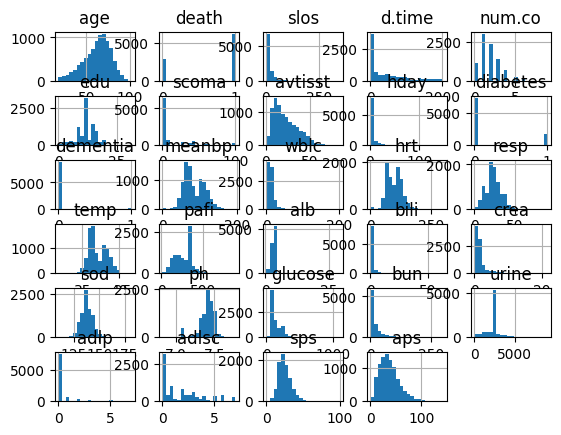

In [30]:
raw_data.hist(bins = 20)
plt.show()


<Axes: >

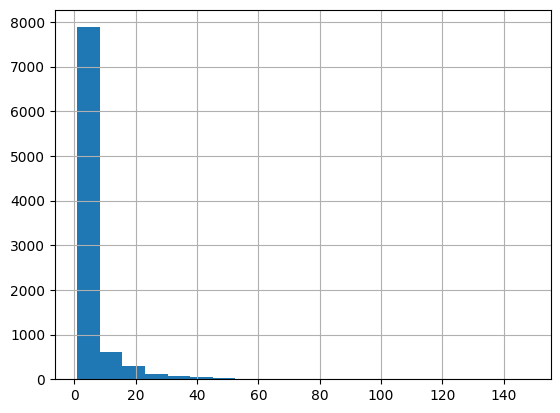

In [26]:
raw_data['hday'].hist(bins = 20)

In [11]:
import pandas as pd
pd.isna(raw_data).sum()


age         0
death       0
sex         0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
avtisst     0
race        0
hday        0
diabetes    0
dementia    0
ca          0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adlsc       0
sps         0
aps         0
dtype: int64